In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [106]:
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_People")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_mixed")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_Food")

In [107]:
extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]


In [108]:
numitems_people = len(user_filenames)
print(numitems_people)

numitems_food = len(food_filenames)
print(numitems_food)

38
0


In [109]:
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 df_total_user.append(temp_f)

In [110]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 df_total_food.append(temp_f)

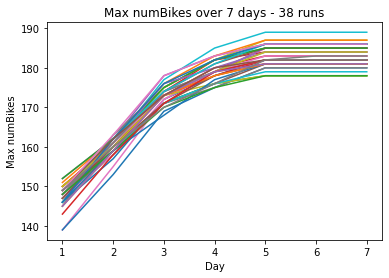

In [111]:
# Step 1: Loop over the list of dataframes and extract the maximum "NumBikes" for each day
max_values = []
for df in df_total_user:
    max_values.append(df.groupby('Day')['NumBikes'].max())

# Step 2: Create a figure and axes for the plot
fig, ax = plt.subplots()

# Step 4: Plot the lines for each dataframe
for i, values in enumerate(max_values):
    ax.plot(values.index, values.values, label=f'Dataframe {i+1}')

# Step 5: Add labels, legend, and title to the plot
ax.set_xlabel('Day')
ax.set_ylabel('Max numBikes')
#ax.legend()

# Define the custom tick formatter function
def subtract_six(x, pos):
    return int(x - 6)

# Create the custom tick formatter for the x-axis
formatter = FuncFormatter(subtract_six)
ax.xaxis.set_major_formatter(formatter)


plt.title('Max numBikes over 7 days - 38 runs')

# Step 6: Display the plot
plt.show()


In [112]:
df

,Cycle,Day,Time,NumBikes,Battery,AutDrivingSpeed,MaxBiddingTime,PackBidCt,PackBidDist,PackBidQueue,...,Trip Served,Wait Time (min),Departure Time,Arrival Time,Duration (min),Origin [lat],Origin [lon],Destination [lat],Destination [lon],Distance (m)
0,2105,7,01:10:10,3,70000.0,8.0,0,100.0,0.01,2.0,...,True,1.266667,01:03:18,01:10:10,6.866667,-71.092771,42.359530,-71.094506,42.367050,1267.813274
1,2408,7,01:20:16,3,70000.0,8.0,0,100.0,0.01,2.0,...,True,0.466667,01:08:30,01:20:16,11.766667,-71.100359,42.365752,-71.084082,42.369789,2029.238932
2,2414,7,01:20:28,3,70000.0,8.0,0,100.0,0.01,2.0,...,True,3.366667,01:04:24,01:20:28,16.066667,-71.112190,42.378225,-71.085000,42.371912,2720.367357
3,3030,7,01:41:00,4,70000.0,8.0,0,100.0,0.01,2.0,...,True,10.300000,01:26:20,01:41:00,14.666667,-71.103395,42.361522,-71.079344,42.365714,2465.467855
4,3377,7,01:52:34,4,70000.0,8.0,0,100.0,0.01,2.0,...,True,0.400000,01:39:26,01:52:34,13.133333,-71.077975,42.367067,-71.098748,42.360846,2248.165693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14302,302169,13,23:52:18,182,70000.0,8.0,0,100.0,0.01,2.0,...,True,7.600000,23:45:38,23:52:18,6.666667,-71.095043,42.359382,-71.101321,42.360922,708.903024
14303,302203,13,23:53:26,182,70000.0,8.0,0,100.0,0.01,2.0,...,True,0.866667,23:45:54,23:53:26,7.533333,-71.114341,42.370606,-71.117148,42.377536,911.994675
14304,302222,13,23:54:04,182,70000.0,8.0,0,100.0,0.01,2.0,...,True,5.933333,23:27:58,23:54:04,26.100000,-71.099123,42.359856,-71.120918,42.389045,4232.707980
14305,302299,13,23:56:38,182,70000.0,8.0,0,100.0,0.01,2.0,...,True,2.133333,23:48:10,23:56:38,8.466667,-71.115481,42.369033,-71.102293,42.364216,1224.825304


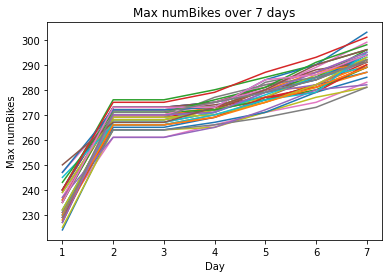

In [69]:
# Step 1: Loop over the list of dataframes and extract the maximum "NumBikes" for each day
max_values = []
for df in df_total_food:
    max_values.append(df.groupby('Day')['NumBikes'].max())

# Step 2: Create a figure and axes for the plot
fig, ax = plt.subplots()

# Step 4: Plot the lines for each dataframe
for i, values in enumerate(max_values):
    ax.plot(values.index, values.values, label=f'Dataframe {i+1}')

# Step 5: Add labels, legend, and title to the plot
ax.set_xlabel('Day')
ax.set_ylabel('Max numBikes')
#ax.legend()

# Define the custom tick formatter function
def subtract_six(x, pos):
    return int(x - 6)

# Create the custom tick formatter for the x-axis
formatter = FuncFormatter(subtract_six)
ax.xaxis.set_major_formatter(formatter)


plt.title('Max numBikes over 7 days')

# Step 6: Display the plot
plt.show()

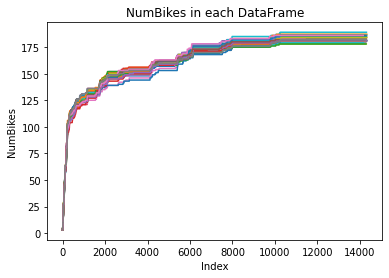

In [83]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_user):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

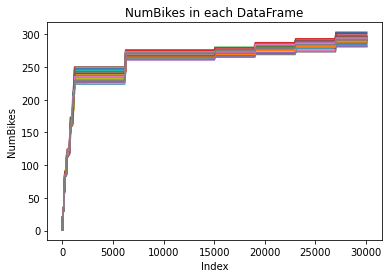

In [77]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_food):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

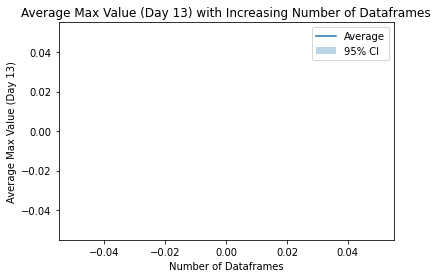

In [70]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_13 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_user):
    max_value_day_13 = df.loc[df['Day'] == 13, 'NumBikes'].max()
    max_values_day_13.append(max_value_day_13)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_13[:i + 1])
    std_value = np.std(max_values_day_13[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_user) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Max Value (Day 13)')
plt.title('Average Max Value (Day 13) with Increasing Number of Dataframes')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_user = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [40]:
print(df_table_user)


Empty DataFrame
Columns: [Number of Dataframes, Average, CI Lower, CI Upper, CI Delta]
Index: []


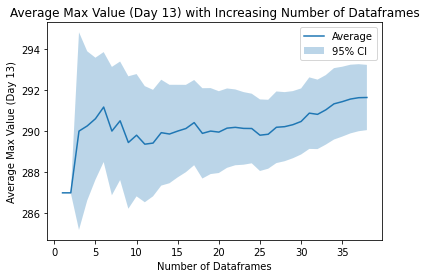

In [41]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_13 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_food):
    max_value_day_13 = df.loc[df['Day'] == 13, 'NumBikes'].max()
    max_values_day_13.append(max_value_day_13)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_13[:i + 1])
    std_value = np.std(max_values_day_13[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Max Value (Day 13)')
plt.title('Average Max Value (Day 13) with Increasing Number of Dataframes')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_food = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [42]:
print(df_table_food)

    Number of Dataframes     Average    CI Lower    CI Upper  CI Delta
0                      1  287.000000  287.000000  287.000000  0.000000
1                      2  287.000000  287.000000  287.000000  0.000000
2                      3  290.000000  285.199000  294.801000  9.602000
3                      4  290.250000  286.624331  293.875669  7.251338
4                      5  290.600000  287.635277  293.564723  5.929445
5                      6  291.166667  288.496113  293.837221  5.341108
6                      7  290.000000  286.882052  293.117948  6.235896
7                      8  290.500000  287.621902  293.378098  5.756197
8                      9  289.444444  286.227356  292.661533  6.434178
9                     10  289.800000  286.830099  292.769901  5.939803
10                    11  289.363636  286.543263  292.184010  5.640747
11                    12  289.416667  286.829410  292.003924  5.174514
12                    13  289.923077  287.351486  292.494667  5.143181
13    